<a href="https://colab.research.google.com/github/sidkatiyar09/Data-Analytics/blob/main/food_dataset_2_categories_only_capstone_GOOGLENET_(INCEPTIONV3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 380s 38s/step - accuracy: 0.5578 - loss: 28.7793 - val_accuracy: 0.7050 - val_loss: 7.3171
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 373s 38s/step - accuracy: 0.6924 - loss: 6.2528 - val_accuracy: 0.7383 - val_loss: 4.5686
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 385s 38s/step - accuracy: 0.6990 - loss: 3.7898 - val_accuracy: 0.6333 - val_loss: 2.3523
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 377s 38s/step - accuracy: 0.6161 - loss: 2.4445 - val_accuracy: 0.7217 - val_loss: 1.9121
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 360s 38s/step - accuracy: 0.6822 - loss: 1.4006 - val_accuracy: 0.7167 - val_loss: 1.8152
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 357s 35s/step - accuracy: 0.6969 - loss: 1.3020 - val_accuracy: 0.7150 - val_loss: 1.3205
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 416s 39s/step - accura

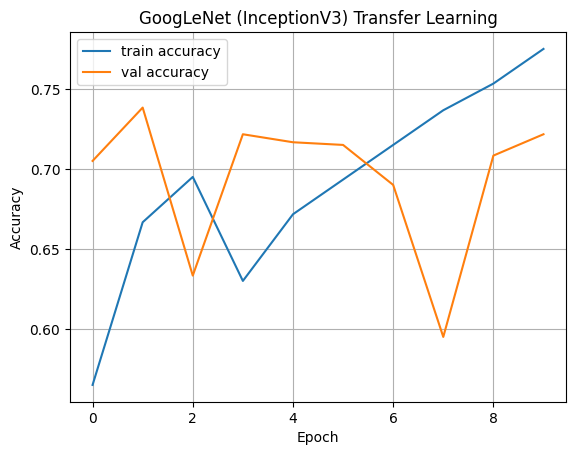

In [4]:
# GOOGLENET (INCEPTIONV3) TRAINING ON 1 MILLION IMAGES (TRANSFER LEARNING)

# ============================
# SETUP
# ============================

!pip install tensorflow opencv-python -q

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# ============================
# DATASET CONFIGURATION
# ============================

# Adjust path to your root image folder
DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset_shared_final"
BATCH_SIZE = 64
IMG_SIZE = (299, 299)  # Required input size for InceptionV3

train_ds = image_dataset_from_directory(
    DATA_DIR + "/train",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=None  # Assuming already pre-split
)

val_ds = image_dataset_from_directory(
    DATA_DIR + "/val",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

test_ds = image_dataset_from_directory(
    DATA_DIR + "/test",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

# ============================
# INCEPTIONV3 (GOOGLENET) TRANSFER LEARNING MODEL
# ============================

base_model = InceptionV3(include_top=False, weights="imagenet", input_shape=(299, 299, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ============================
# TRAINING
# ============================

EPOCHS = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# ============================
# EVALUATE ON TEST SET
# ============================

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# ============================
# PLOT RESULTS
# ============================

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('GoogLeNet (InceptionV3) Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
